<a href="https://colab.research.google.com/github/awidener21/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')

In [45]:
# List of other available plot styles you can use instead of "fast"
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [46]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [47]:
# cabin class is a categorical variable
# it can be displayed using either number or string values
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


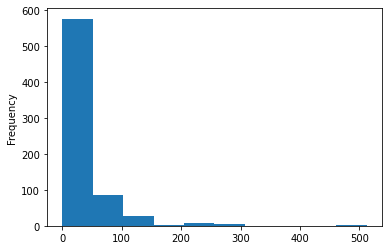

In [48]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

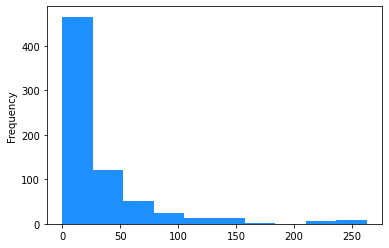

In [49]:
# Remove two extreme outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist',color='dodgerblue');

In [50]:
# A continuous variable can be converted to a categorical var using binning.
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

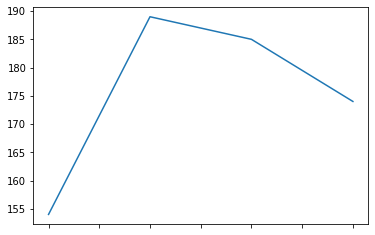

In [51]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot();
# myresults.plot(ylim=(0,200));

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/nba-player-advanced-metrics/master/nba-data-historical.csv', encoding = 'latin-1')
df.head()

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,youngtr01,Trae Young,2020,21,PG,ATL,-7.6,ATL,60,2120,65.1,35.3,29.3,59.5,9.2,4.2,1.2,4.8,7.1,-3.5,3.6,7.0,17.0,15.4,34.9,45.6,16.2,1.6,11.5,6.5,1.4,0.3,113.6,36.1,117.2,50.1,36.1,86.0,45.5,44.8
1,huntede01,De'Andre Hunter,2020,22,SF,ATL,-7.6,ATL,63,2018,62.0,32.0,13.5,52.1,1.9,5.0,1.1,1.8,-2.5,-1.3,-3.8,-1.1,5.9,4.7,17.5,8.0,12.1,2.3,13.1,7.6,1.0,0.7,99.5,16.9,117.3,45.4,35.5,76.4,44.5,21.1
2,huertke01,Kevin Huerter,2020,21,SG,ATL,-7.6,ATL,56,1760,54.1,31.4,13.6,53.6,4.2,4.5,1.5,1.7,-0.4,-2.4,-2.8,-0.1,8.0,8.1,17.1,17.5,12.0,2.1,12.0,7.0,1.4,1.3,107.1,17.2,116.5,45.3,38.0,82.8,54.8,10.5
3,reddica01,Cam Reddish,2020,20,SF,ATL,-7.6,ATL,58,1551,47.6,26.7,13.7,50.0,2.0,4.9,2.0,2.2,-2.8,-0.1,-3.0,-0.2,5.9,5.0,18.9,8.0,13.6,2.4,12.7,7.5,1.9,1.5,94.7,18.3,115.0,42.8,33.2,80.2,45.1,22.7
4,collijo01,John Collins,2020,22,PF,ATL,-7.6,ATL,41,1363,41.9,33.2,22.7,65.9,1.5,10.7,2.5,1.9,-0.0,-0.3,-0.3,1.7,15.6,17.1,22.7,7.6,10.1,9.0,24.0,16.4,1.1,4.1,123.7,21.6,112.2,64.2,40.1,80.0,24.3,24.8


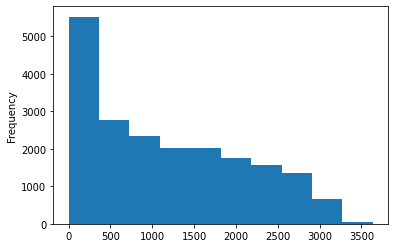

In [71]:
df['Min'].plot(kind='hist');

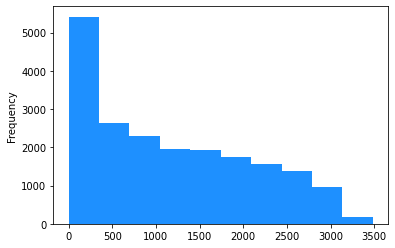

In [76]:
df=df[df['Min']<3500]
df['Min'].plot(kind='hist',color='dodgerblue');

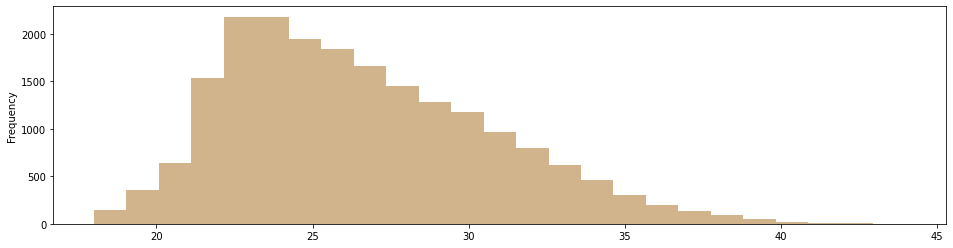

In [90]:
df['age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

In [104]:
agebins=[20,25,35,40,44]
agelabels=['low', 'medium', 'high','vhigh']
df['age_groups']= pd.cut(df['age'], bins=agebins, labels=agelabels)
myresults = df['age_groups'].value_counts().sort_index()
myresults

low        8483
medium    10565
high        495
vhigh        12
Name: age_groups, dtype: int64

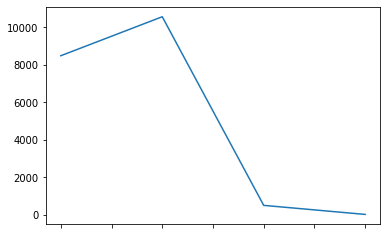

In [105]:
myresults.plot();

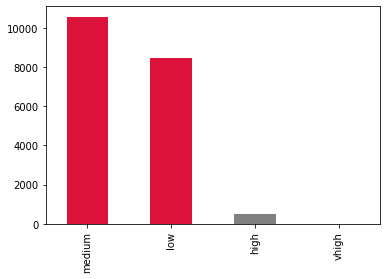

In [106]:
df['age_groups'].value_counts().plot(kind='bar', color=['crimson', 'crimson', 'gray', 'gray']);

In [107]:
age_pos = pd.crosstab(df['age'],df['pos'])
age_pos

pos,C,F,G,G-F,PF,PG,SF,SG
age,,,,,,,,
18,5,0,0,0,2,1,3,1
19,31,0,0,0,31,16,29,28
20,79,1,0,0,73,60,78,64
21,116,0,0,0,154,126,119,130
22,246,0,0,0,322,302,321,344
23,365,1,0,0,440,437,437,495
24,390,0,0,0,465,414,439,474
25,363,0,0,0,415,378,386,404
26,366,0,0,1,361,353,366,399


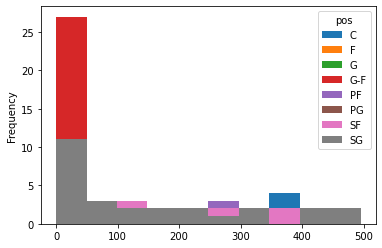

In [112]:
age_pos.plot(kind='hist');

In [114]:
age_pos = pd.crosstab(df['age'],df['pos'], normalize='index')
age_pos

pos,C,F,G,G-F,PF,PG,SF,SG
age,,,,,,,,
18,0.416667,0.000000,0.00000,0.000000,0.166667,0.083333,0.250000,0.083333
19,0.229630,0.000000,0.00000,0.000000,0.229630,0.118519,0.214815,0.207407
20,0.222535,0.002817,0.00000,0.000000,0.205634,0.169014,0.219718,0.180282
21,0.179845,0.000000,0.00000,0.000000,0.238760,0.195349,0.184496,0.201550
22,0.160261,0.000000,0.00000,0.000000,0.209772,0.196743,0.209121,0.224104
23,0.167816,0.000460,0.00000,0.000000,0.202299,0.200920,0.200920,0.227586
24,0.178735,0.000000,0.00000,0.000000,0.213107,0.189734,0.201192,0.217232
25,0.186536,0.000000,0.00000,0.000000,0.213258,0.194245,0.198356,0.207605
26,0.198267,0.000000,0.00000,0.000542,0.195558,0.191224,0.198267,0.216143


In [115]:
df['age'].mean()

26.690182978511242

In [120]:
age_pos = df.groupby('pos')['age'].mean()
age_pos

pos
C      27.217881
F      26.250000
G      28.000000
G-F    27.000000
PF     26.643113
PG     26.723812
SF     26.454309
SG     26.413944
Name: age, dtype: float64

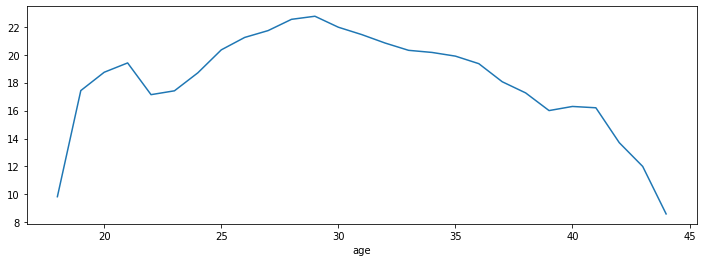

In [122]:
df.groupby('age')['MPG'].mean().plot(figsize=(12,4));

In [124]:
corr_matrix = df.corr()
corr_matrix

,year_id,age,tmRtg,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
year_id,1.000000,0.004758,0.003699,-0.142262,-0.113852,-0.098891,-0.042492,-0.011537,0.052828,-0.056209,0.040913,-0.031539,-0.176100,0.009119,0.010952,0.012918,-0.049174,0.027248,0.044398,-0.053941,-0.028556,-0.163266,-0.117029,0.102409,0.011507,-0.056424,0.097305,0.059432,-0.053143,0.144069,0.051358,0.234035,0.005172,0.498103,-0.099690
age,0.004758,1.000000,0.136100,0.019654,0.040132,0.042175,0.093097,-0.073458,0.033490,0.051171,-0.019645,-0.064361,-0.085307,0.049558,0.027080,0.052768,0.054472,0.035872,0.038573,-0.129434,0.042885,-0.005315,-0.070257,0.012225,-0.023964,-0.051787,-0.039606,0.070568,-0.129625,-0.047586,-0.013608,0.066487,0.098746,0.060934,-0.052487
tmRtg,0.003699,0.136100,1.000000,0.098957,0.059120,0.059814,-0.048194,0.052939,0.084105,0.022415,0.021681,0.030031,-0.012166,0.070758,0.136975,0.127004,0.250505,0.062826,0.065548,0.015163,-0.005352,-0.022335,0.015220,0.001737,0.022276,0.005433,0.029924,0.092048,0.007338,-0.409662,0.078789,0.043988,0.019263,0.044789,-0.001592
G,-0.142262,0.019654,0.098957,1.000000,0.865884,0.855364,0.626507,0.269163,0.347973,0.125066,0.015104,0.057657,-0.084685,0.390893,0.196472,0.407049,0.502507,0.424947,0.407592,0.062774,0.141635,-0.120930,-0.024209,0.047601,0.021778,0.032451,0.028482,0.368169,0.063636,-0.074452,0.281136,0.031755,0.195127,-0.067661,-0.036640
Min,-0.113852,0.040132,0.059120,0.865884,1.000000,0.992889,0.871197,0.404578,0.344727,0.207886,0.001432,0.044618,-0.027728,0.468860,0.201751,0.470339,0.725926,0.525034,0.465956,0.219170,0.245288,-0.150758,-0.063661,0.053612,0.006103,0.052594,-0.003250,0.362719,0.221008,-0.062340,0.267356,0.077107,0.243201,-0.041355,-0.017296
MP%,-0.098891,0.042175,0.059814,0.855364,0.992889,1.000000,0.877205,0.407128,0.346408,0.208532,0.002687,0.045948,-0.029040,0.472917,0.203522,0.474427,0.723135,0.529704,0.470204,0.220948,0.247733,-0.153458,-0.065966,0.055304,0.006135,0.054015,-0.001070,0.364343,0.222777,-0.069237,0.268368,0.081722,0.244092,-0.032195,-0.018618
MPG,-0.042492,0.093097,-0.048194,0.626507,0.871197,0.877205,1.000000,0.444636,0.351452,0.249277,-0.024785,0.023738,-0.025635,0.504482,0.184225,0.488822,0.661533,0.570282,0.494353,0.258328,0.298991,-0.162700,-0.114258,0.049561,-0.023110,0.055997,-0.023306,0.370944,0.260133,-0.010132,0.260856,0.119953,0.273230,0.009157,-0.034815
P/36,-0.011537,-0.073458,0.052939,0.269163,0.404578,0.407128,0.444636,1.000000,0.539744,0.114128,0.016237,-0.018759,0.156900,0.584476,0.017578,0.463480,0.419041,0.668166,0.560250,0.791377,0.211785,-0.308516,0.028716,0.006342,0.018427,0.047830,-0.058784,0.482674,0.755554,0.004584,0.400870,0.205498,0.322606,0.012932,0.074271
TS%,0.052828,0.033490,0.084105,0.347973,0.344727,0.346408,0.351452,0.539744,1.000000,0.017572,0.080520,0.028209,-0.059687,0.664067,0.090885,0.572646,0.305515,0.686634,0.701896,0.031697,0.059316,-0.091028,0.024215,0.109653,0.086951,-0.016393,0.060759,0.869816,0.032247,-0.009263,0.822233,0.288457,0.313803,0.018673,0.188728
A/36,-0.056209,0.051171,0.022415,0.125066,0.207886,0.208532,0.249277,0.114128,0.017572,1.000000,-0.443060,-0.074053,0.215823,0.342342,-0.011078,0.260322,0.314619,0.281673,0.180106,0.164063,0.984133,0.173019,-0.397833,-0.362719,-0.442554,0.278680,-0.315928,0.121327,0.268272,0.115417,-0.041332,0.153323,0.238033,0.171326,-0.095240


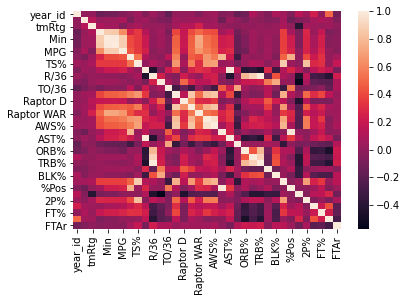

In [126]:
sns.heatmap(corr_matrix);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here